In [1]:
# ### 1. Importing Necessary Libraries
# We start by importing all the tools (libraries) we'll need for data handling,
# visualization, preprocessing, modeling, and evaluation.
import pandas as pd  # For data manipulation and reading CSV files
import numpy as np   # For numerical operations (though less used directly here)
import matplotlib.pyplot as plt # For creating static, interactive, and animated visualizations
import seaborn as sns # Provides a high-level interface for drawing attractive statistical graphics


In [3]:
# Scikit-learn modules for machine learning tasks
from sklearn.model_selection import train_test_split # To split data into training and testing sets
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder # For data scaling and encoding categorical features
from sklearn.compose import ColumnTransformer # Useful for applying different transformations to different columns
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.ensemble import RandomForestClassifier # Random Forest model
from sklearn.metrics import ( # Functions to evaluate model performance
    accuracy_score,
    confusion_matrix,
    classification_report,
    balanced_accuracy_score, # Good metric for imbalanced datasets
    roc_auc_score, # Area under the ROC Curve
    precision_recall_curve, # For plotting Precision-Recall curve
    auc # Area under the PR curve
)

# Set plotting style for nicer visuals
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size


In [5]:
import pandas as pd
# ### 2. Loading the Dataset
# Load the data from the CSV file into a Pandas DataFrame.
# IMPORTANT: Replace 'YOUR_FILE_PATH' with the actual path to your CSV file.
# Using a raw string (r"...") helps handle backslashes in Windows paths correctly.
try:
    # *** Replace with your actual file path ***
    file_path = r"C:\Users\Lenovo\Downloads\Churn_Modelling.csv"
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    print("Please ensure the file path is correct.")
    # Exit or handle error appropriately if the file isn't found
    exit() # Or raise an exception

Dataset loaded successfully.


In [7]:
# ### 3. Initial Data Exploration
# Get a first look at the data structure and content.

# Display the first 5 rows to understand the columns and data format
print("\nFirst 5 rows of the dataset:")
print(df.head())



First 5 rows of the dataset:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93

In [9]:
# Get concise summary: column names, non-null counts, data types, memory usage
print("\nDataset Info:")
df.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
# Check for missing values in each column. Crucial for data quality.
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [13]:
# Observation: No missing values found in this dataset.

In [15]:
# Check for duplicate rows. Duplicates can skew results.
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")



Number of duplicate rows: 0


In [17]:
# Observation: No duplicate rows found.

In [19]:
# Drop columns that are irrelevant for prediction (identifiers, high cardinality text)
# RowNumber, CustomerId, Surname don't provide predictive power for churn itself.
print("\nDropping irrelevant columns: RowNumber, CustomerId, Surname")
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
print("Columns dropped.")
print("\nDataFrame columns after dropping:", df.columns.tolist())



Dropping irrelevant columns: RowNumber, CustomerId, Surname
Columns dropped.

DataFrame columns after dropping: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [21]:
# ### 4. Exploratory Data Analysis (EDA)
# Dive deeper into the data to understand distributions and relationships.

print("\n--- Starting Exploratory Data Analysis (EDA) ---")



--- Starting Exploratory Data Analysis (EDA) ---



Distribution of the Target Variable (Exited):
Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


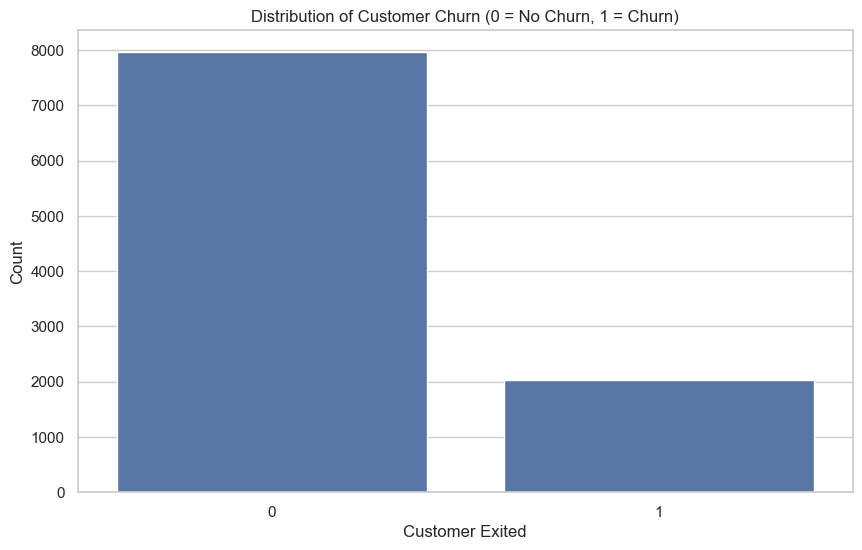

In [23]:
# 4.1. Analyze the Target Variable ('Exited')

print("\nDistribution of the Target Variable (Exited):")
churn_distribution = df['Exited'].value_counts(normalize=True) * 100
print(churn_distribution)
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Customer Churn (0 = No Churn, 1 = Churn)')
plt.xlabel('Customer Exited')
plt.ylabel('Count')
plt.show()


In [25]:
# **Why:** This is critical. We see the dataset is imbalanced (~80% Non-Churn, ~20% Churn).
# This means accuracy alone can be misleading, and models might struggle to predict churn.
# We need to use appropriate techniques (like class weighting or resampling) and metrics.


In [27]:
# 4.2. Analyze Numerical Features

numerical_features = df.select_dtypes(include=np.number).columns.tolist()
# Remove target variable 'Exited' and binary encoded features often treated as categorical
# HasCrCard and IsActiveMember are technically numerical (0/1) but act like categories

binary_like = ['HasCrCard', 'IsActiveMember', 'Exited']
numerical_features = [col for col in numerical_features if col not in binary_like]

print(f"\nAnalyzing Numerical Features: {numerical_features}")
df[numerical_features].describe() # Get summary statistics



Analyzing Numerical Features: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000



Plotting distributions of numerical features:


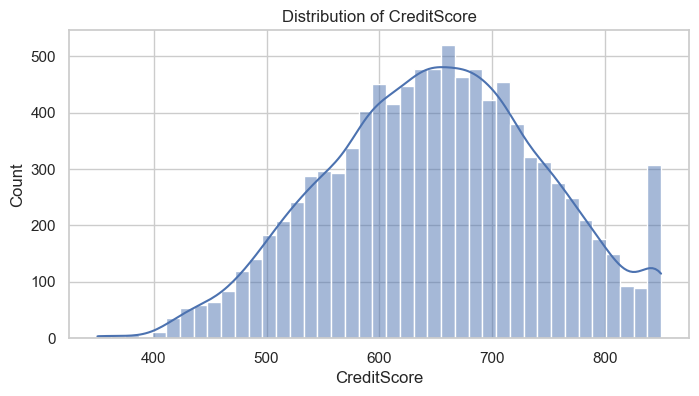

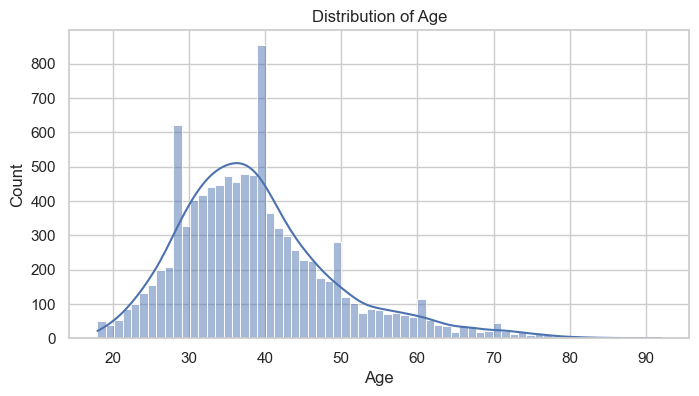

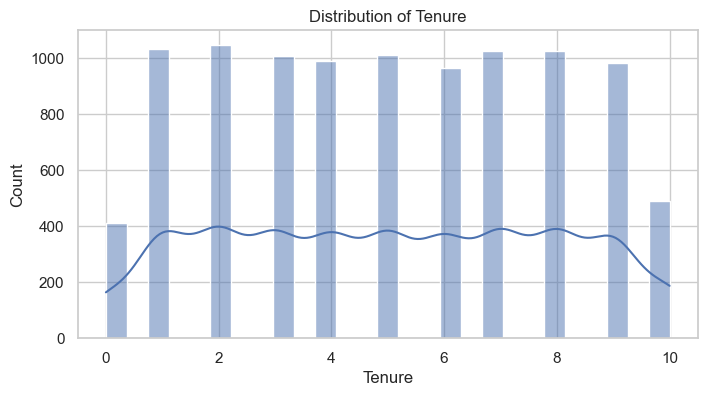

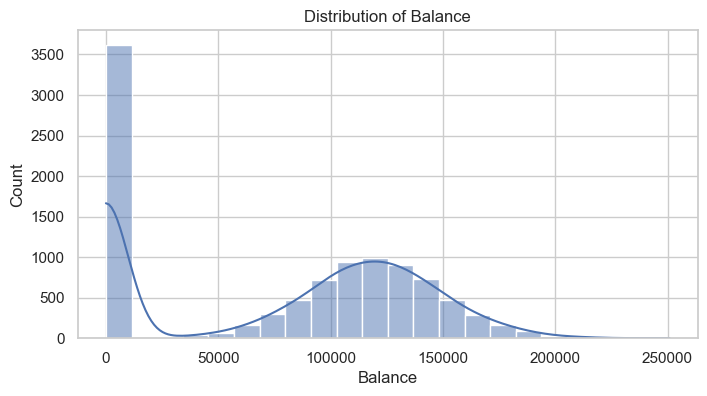

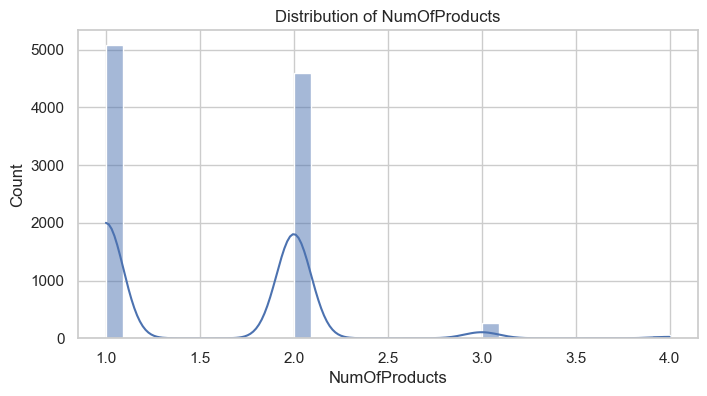

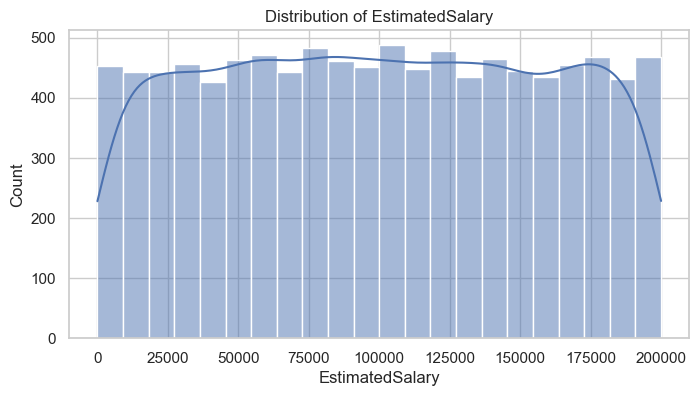

In [29]:
# Plot distributions of numerical features

print("\nPlotting distributions of numerical features:")
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [31]:
# **Why:** Understand the range, central tendency, and skewness of numerical data.



Analyzing Categorical Features: ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

Plotting distributions of categorical features:


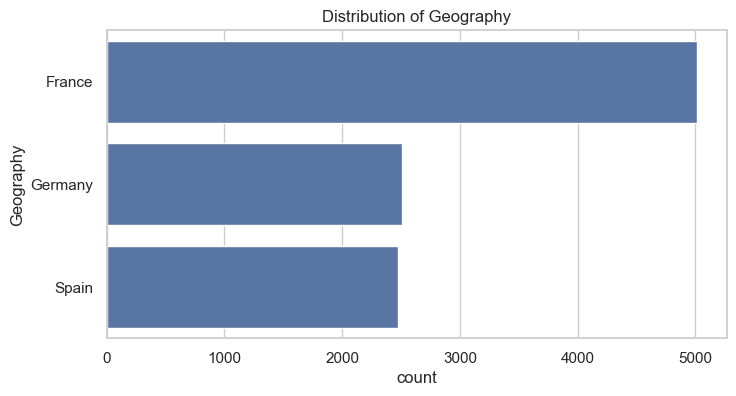

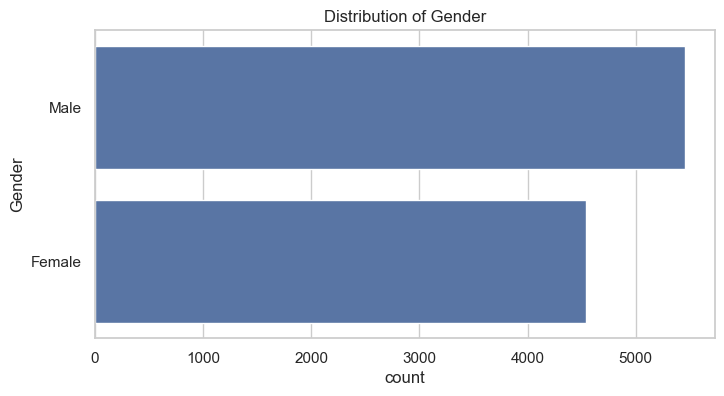

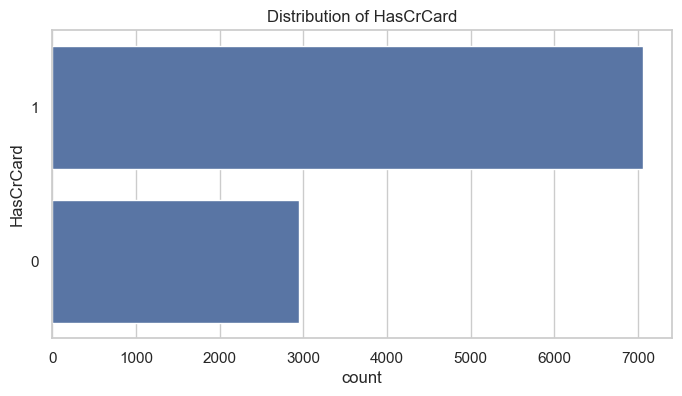

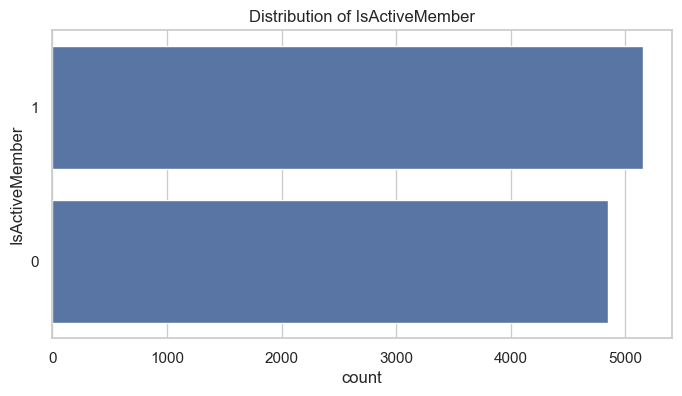

In [33]:
# 4.3. Analyze Categorical Features (Original ones before encoding)

categorical_features = df.select_dtypes(include='object').columns.tolist()
# Add binary features that behave like categories
categorical_features.extend(['HasCrCard', 'IsActiveMember'])
print(f"\nAnalyzing Categorical Features: {categorical_features}")

# Plot distributions of categorical features
print("\nPlotting distributions of categorical features:")
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=df, order = df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()


In [35]:
# **Why:** Understand the frequency of different categories within these features.


Analyzing relationships between features and Churn:

Numerical Features vs. Churn:


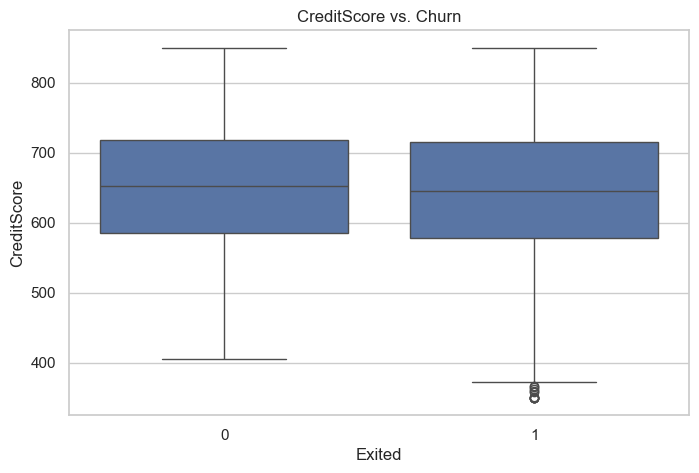

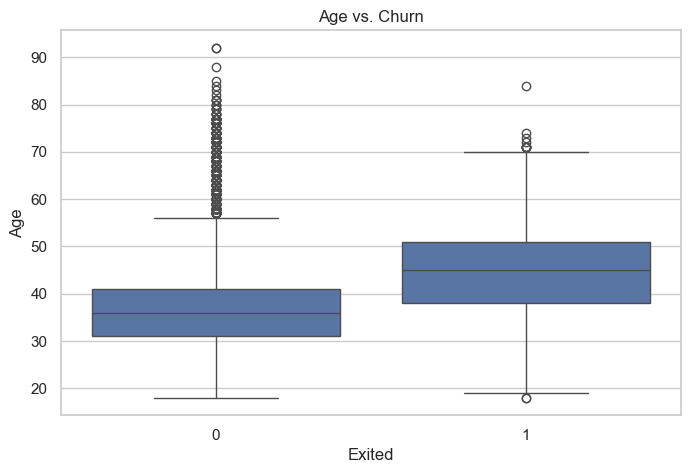

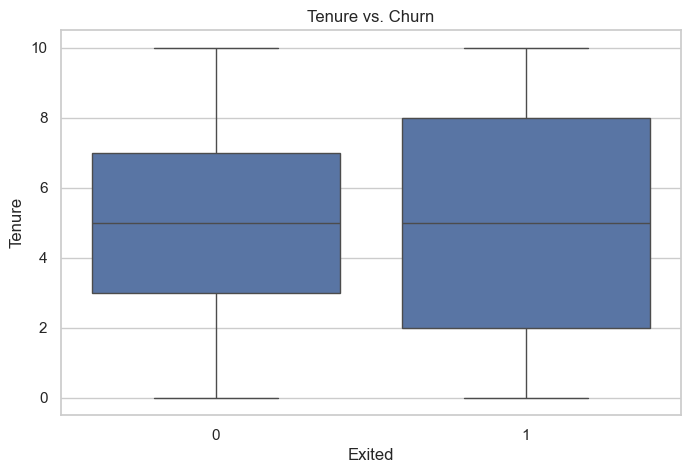

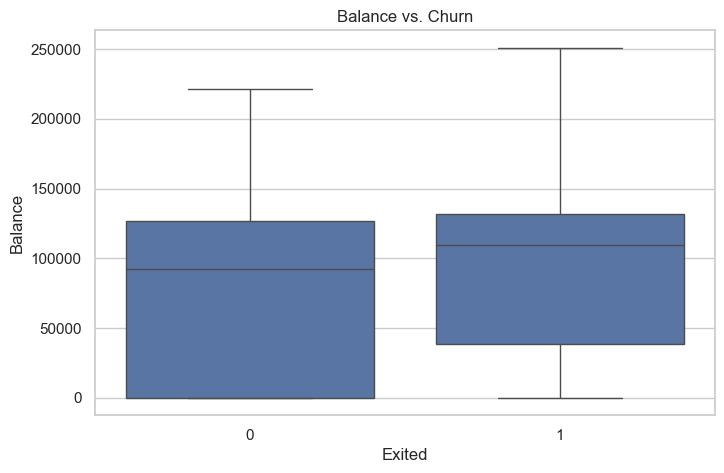

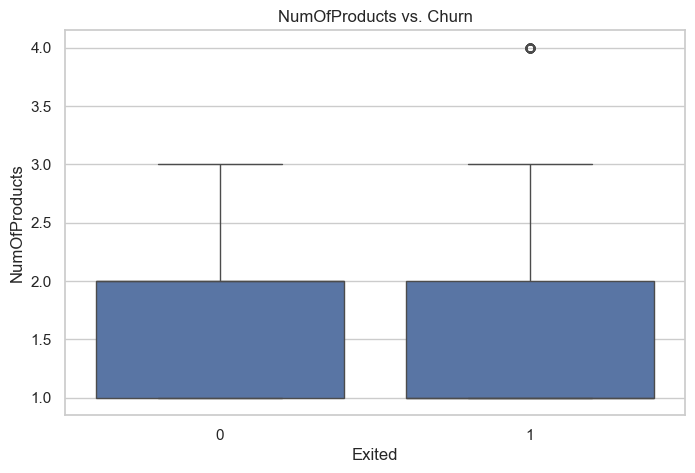

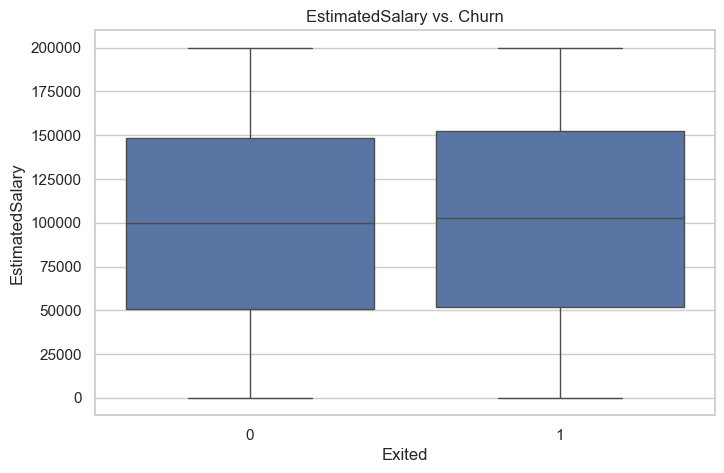

In [37]:
# 4.4. Relationship between Features and Target Variable ('Exited')
print("\nAnalyzing relationships between features and Churn:")

# Numerical features vs. Churn
print("\nNumerical Features vs. Churn:")
for col in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Exited', y=col, data=df)
    plt.title(f'{col} vs. Churn')
    plt.show()
    

In [39]:
# **Why:** See if the distribution of numerical features differs significantly between churned and non-churned customers.


Categorical Features vs. Churn:


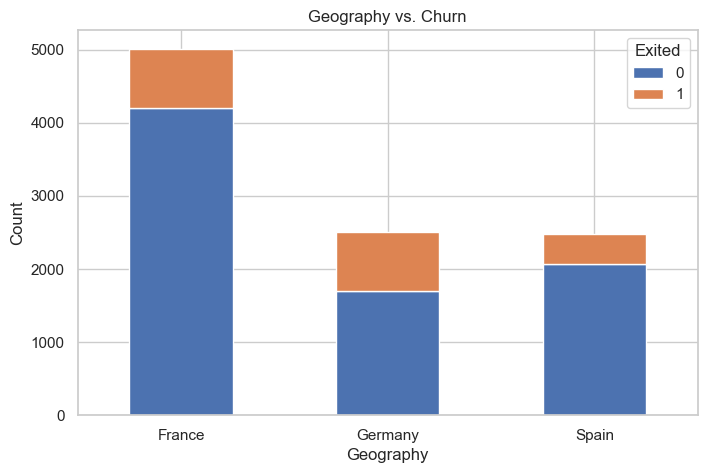

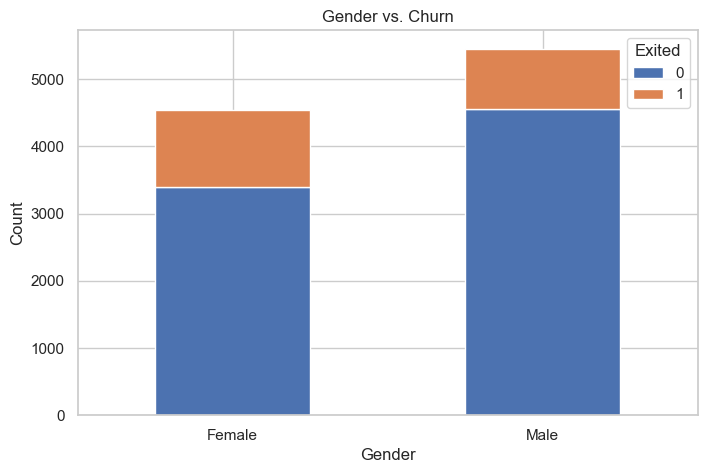

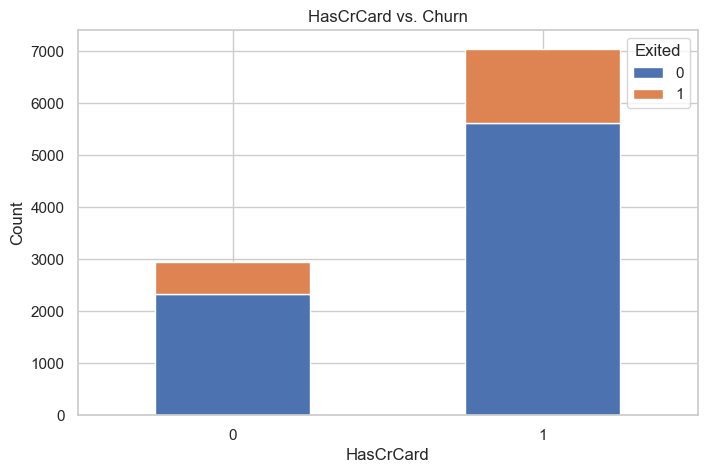

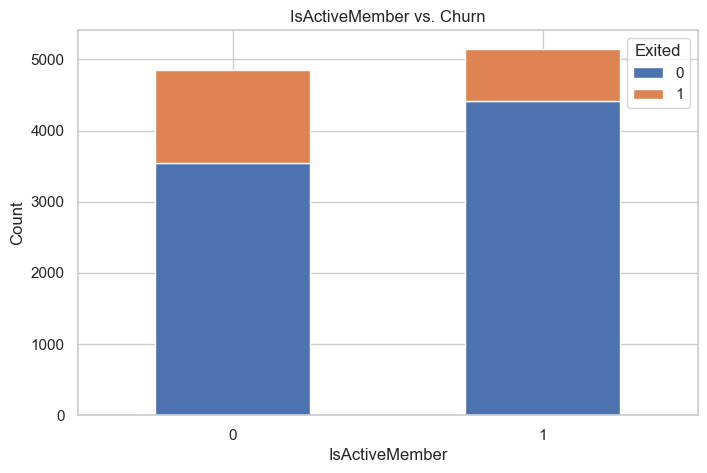

In [41]:
# Categorical features vs. Churn

print("\nCategorical Features vs. Churn:")
for col in categorical_features:
    # Use pd.crosstab to get counts for plotting
    pd.crosstab(df[col], df['Exited']).plot(kind='bar', stacked=True, figsize=(8, 5))
    plt.title(f'{col} vs. Churn')
    plt.ylabel('Count')
    plt.xticks(rotation=0) # Keep labels horizontal
    plt.show()
# **Why:** Check if certain categories within features are more associated with churn.



Correlation matrix for numerical features:


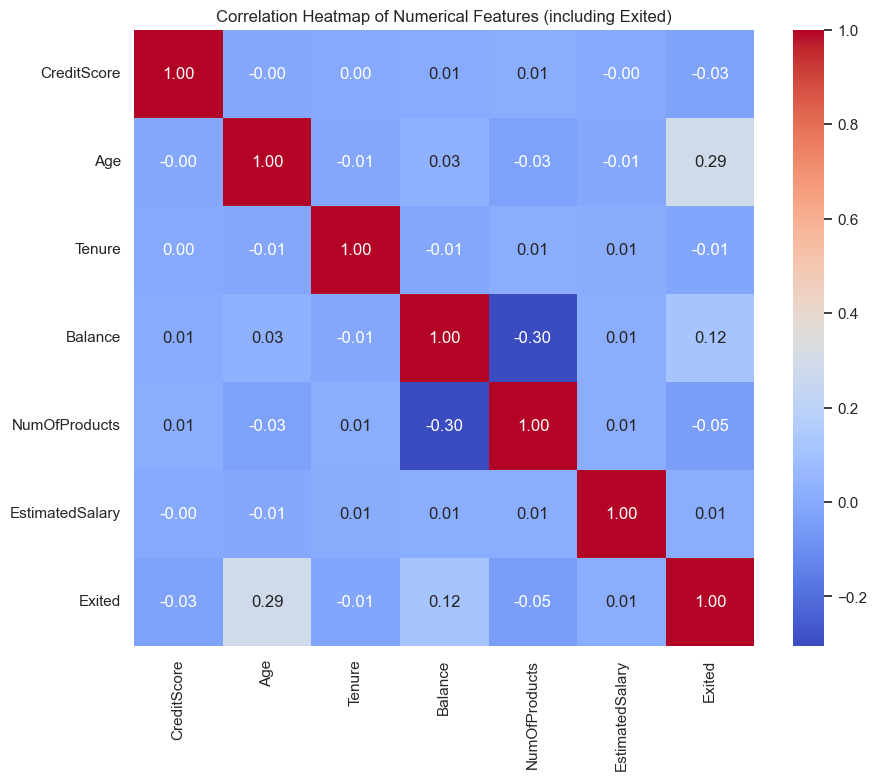


--- EDA Completed ---


In [43]:
# 4.5. Correlation Analysis (for numerical features)

print("\nCorrelation matrix for numerical features:")
plt.figure(figsize=(10, 8))

# Select only numerical columns for correlation calculation
numeric_df_for_corr = df[numerical_features + ['Exited']] # Include target to see correlations with it
sns.heatmap(numeric_df_for_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features (including Exited)')
plt.show()
# **Why:** Identify potential multicollinearity (high correlation between predictors)
# and see direct linear correlations between numerical features and churn.

print("\n--- EDA Completed ---")

In [45]:
 ### 5. Preprocessing
# Prepare the data for modeling.

print("\n--- Starting Preprocessing ---")



--- Starting Preprocessing ---


In [47]:
# 5.1. Encoding Categorical Features
# Convert categorical string data into numerical format that models can understand.

# Label Encoding for 'Gender' (Binary: 0 or 1)
# **Why:** Simple and efficient for binary categorical features.
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
print("\n'Gender' column encoded using LabelEncoder.")
# Display mapping: 0 -> Female, 1 -> Male (or vice-versa depending on fit order)
print("Gender mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# One-Hot Encoding for 'Geography' (Multiple categories)
# **Why:** Creates new binary columns for each category, avoiding artificial ordering
# that LabelEncoder would impose on non-binary features.
# drop_first=True avoids multicollinearity by dropping one category (redundant info).
df = pd.get_dummies(df, columns=['Geography'], drop_first=True, dtype=int) # Use dtype=int for 0/1
print("\n'Geography' column encoded using One-Hot Encoding (pd.get_dummies).")
print("\nDataFrame columns after encoding:", df.columns.tolist())
print("\nFirst 5 rows after encoding:")
print(df.head())


'Gender' column encoded using LabelEncoder.
Gender mapping: {'Female': 0, 'Male': 1}

'Geography' column encoded using One-Hot Encoding (pd.get_dummies).

DataFrame columns after encoding: ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain']

First 5 rows after encoding:
   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  Geography_Spain  
0               1        101348.88       1                  0          

In [49]:
# 5.2. Define Features (X) and Target (y)
# Separate the independent variables (features) from the dependent variable (target).
print("\nDefining Features (X) and Target (y)...")
X = df.drop('Exited', axis=1) # Features: all columns except 'Exited'
y = df['Exited']             # Target: the 'Exited' column

# Get feature names for later use (e.g., feature importance)
feature_names = X.columns.tolist()
print("Features (X) defined.")
print("Target (y) defined.")


Defining Features (X) and Target (y)...
Features (X) defined.
Target (y) defined.


In [51]:
# ### 6. Train-Test Split
# Divide the data into a training set (to build the model) and a testing set
# (to evaluate its performance on unseen data).

print("\nSplitting data into Training and Testing sets...")
# test_size=0.2 means 20% of the data will be used for testing, 80% for training.
# random_state=42 ensures the split is the same every time we run the code (reproducibility).
# stratify=y is crucial for imbalanced datasets. It ensures that the proportion of
# churned vs. non-churned customers is the same in both the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")
print("Train/Test split complete.")



Splitting data into Training and Testing sets...
Training set shape: X_train=(8000, 11), y_train=(8000,)
Testing set shape: X_test=(2000, 11), y_test=(2000,)
Train/Test split complete.


In [53]:
# ### 7. Feature Scaling
# Scale numerical features so they have a similar range (mean=0, std dev=1).
# **Why:** Many algorithms (like Logistic Regression, SVMs, KNNs) perform better or converge
# faster when features are on a similar scale. It prevents features with larger values
# from dominating the model. Tree-based models like Random Forest are less sensitive,
# but scaling doesn't hurt them.

print("\nScaling numerical features using StandardScaler...")
# Identify numerical columns for scaling (ensure boolean Geography columns are not scaled)
# Reuse the 'numerical_features' list defined during EDA
print(f"Numerical features to be scaled: {numerical_features}")

scaler = StandardScaler()

# Fit the scaler ONLY on the training data's numerical features to learn mean/std dev
scaler.fit(X_train[numerical_features])

# Transform BOTH the training and testing data's numerical features using the learned parameters
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print("Scaling complete.")
print("\nFirst 5 rows of scaled X_train:")
# Displaying as DataFrame for clarity, though it's a NumPy array after transform
print(pd.DataFrame(X_train, columns=feature_names).head())



Scaling numerical features using StandardScaler...
Numerical features to be scaled: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
Scaling complete.

First 5 rows of scaled X_train:
      CreditScore  Gender       Age    Tenure   Balance  NumOfProducts  \
2151     1.058568       1  1.715086  0.684723 -1.226059      -0.910256   
8392     0.913626       1 -0.659935 -0.696202  0.413288      -0.910256   
5006     1.079274       0 -0.184931 -1.731895  0.601687       0.808830   
4117    -0.929207       1 -0.184931 -0.005739 -1.226059       0.808830   
7182     0.427035       1  0.955079  0.339492  0.548318       0.808830   

      HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  \
2151          1               0         1.042084                  0   
8392          1               0        -0.623556                  1   
5006          1               1         0.308128                  1   
4117          1               0        -0.290199       

In [55]:
# ### 8. Model Training
# Build and train the classification models.
# We will use Logistic Regression and Random Forest.
# **Addressing Imbalance:** We use `class_weight='balanced'` which automatically adjusts
# weights inversely proportional to class frequencies. This gives more importance
# to the minority class (churn) during training.

print("\n--- Starting Model Training ---")



--- Starting Model Training ---


In [57]:
# 8.1. Logistic Regression
print("\nTraining Logistic Regression model...")
# random_state for reproducibility
# class_weight='balanced' tells the model to penalize mistakes on the minority class more
log_reg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000) # Increased max_iter for convergence
log_reg.fit(X_train, y_train)
print("Logistic Regression training complete.")



Training Logistic Regression model...
Logistic Regression training complete.


In [59]:
# 8.2. Random Forest Classifier
print("\nTraining Random Forest Classifier model...")
# n_estimators=100: number of trees in the forest
# random_state for reproducibility
# class_weight='balanced' same reason as above
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1) # n_jobs=-1 uses all available CPU cores
rf_clf.fit(X_train, y_train)
print("Random Forest training complete.")



Training Random Forest Classifier model...
Random Forest training complete.


In [61]:
# ### 9. Model Evaluation
# Evaluate the trained models on the unseen test set.

print("\n--- Starting Model Evaluation ---")

# Helper function to plot confusion matrix as a heatmap
def plot_confusion_matrix(cm, classes, model_name):
    """Plots a confusion matrix using Seaborn's heatmap."""
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



--- Starting Model Evaluation ---


In [63]:
def evaluate_model(model, X_test, y_test, model_name, class_labels=['Non-Churn', 'Churn']):
    """Evaluates the model and prints key metrics."""
    print(f"\n--- Evaluating {model_name} ---")
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilities for the positive class (Churn)

    # Calculate Metrics
    accuracy = accuracy_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    # Precision, Recall, F1-score
    report = classification_report(y_test, y_pred, target_names=class_labels)
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    # ROC AUC Score
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    # Precision-Recall AUC Score
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)

    # Print Metrics
    print(f"Overall Accuracy: {accuracy:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}") # More reliable for imbalance
    print(f"ROC AUC Score: {roc_auc:.4f}") # Ability to distinguish between classes
    print(f"Precision-Recall AUC Score: {pr_auc:.4f}") # Often more informative for imbalance
    print("\nClassification Report:")
    print(report)
    print("\nConfusion Matrix:")
    plot_confusion_matrix(cm, class_labels, model_name)

    # Return metrics if needed elsewhere
    return {'accuracy': accuracy, 'balanced_accuracy': balanced_acc, 'roc_auc': roc_auc, 'pr_auc': pr_auc}



--- Evaluating Logistic Regression ---
Overall Accuracy: 0.7135
Balanced Accuracy: 0.7086
ROC AUC Score: 0.7771
Precision-Recall AUC Score: 0.4662

Classification Report:
              precision    recall  f1-score   support

   Non-Churn       0.90      0.72      0.80      1593
       Churn       0.39      0.70      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000


Confusion Matrix:


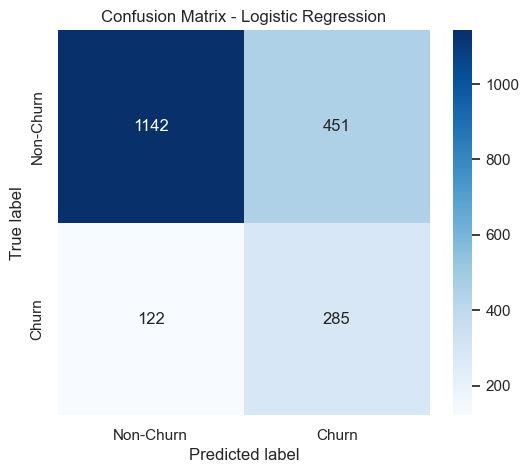

In [65]:
# Evaluate Logistic Regression
log_reg_metrics = evaluate_model(log_reg, X_test, y_test, "Logistic Regression")



--- Evaluating Random Forest Classifier ---
Overall Accuracy: 0.8615
Balanced Accuracy: 0.7036
ROC AUC Score: 0.8529
Precision-Recall AUC Score: 0.6770

Classification Report:
              precision    recall  f1-score   support

   Non-Churn       0.87      0.97      0.92      1593
       Churn       0.79      0.44      0.56       407

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000


Confusion Matrix:


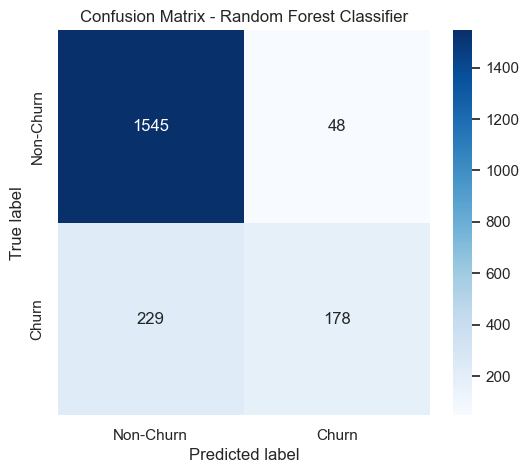

In [67]:
# Evaluate Random Forest
rf_metrics = evaluate_model(rf_clf, X_test, y_test, "Random Forest Classifier")


In [69]:
# ### 10. Feature Importance (from Random Forest)
# Identify which features the Random Forest model found most influential.
# **Why:** Helps understand the key drivers of churn according to the model, providing business insights.

print("\n--- Feature Importance Analysis (Random Forest) ---")
importances = rf_clf.feature_importances_
# Create a mapping of feature names to their importance scores
feature_importance_map = dict(zip(feature_names, importances))



--- Feature Importance Analysis (Random Forest) ---


In [71]:
# Sort the features by importance in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importances = importances[sorted_indices]


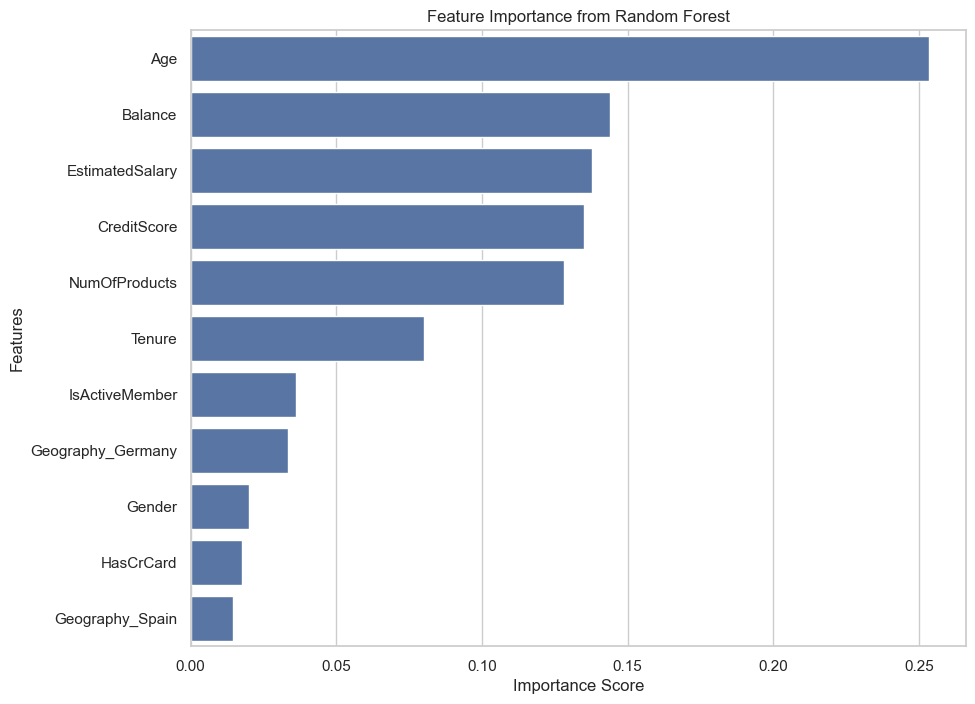

In [73]:
# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_importances, y=sorted_feature_names)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [75]:
print("\nTop 5 most important features:")
for i in range(min(5, len(sorted_feature_names))):
    print(f"{i+1}. {sorted_feature_names[i]}: {sorted_importances[i]:.4f}")



Top 5 most important features:
1. Age: 0.2534
2. Balance: 0.1439
3. EstimatedSalary: 0.1379
4. CreditScore: 0.1348
5. NumOfProducts: 0.1281
